# Importing the required liberaries

In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing the DataSet

In [5]:
df = pd.read_csv("Data (1).csv")

In [3]:
# Displaying the data
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [4]:
# checking the no: of rows and columns
print("number of rows: ",df.shape[0])
print("number of columns: ",df.shape[1])

number of rows:  25000
number of columns:  24


# Verify the given data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [6]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [7]:
#checking the null values
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [8]:
# Checking the null values in percentage
((df.isnull().sum())/len(df)) * 100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [9]:
# droping the null values with more percentage
df.drop("wh_est_year",axis=1,inplace=True)


# Filling the null values

In [10]:
# checking the null values before updating the null values
df['workers_num'].isnull().sum()

990

In [11]:
# filling the null values of "workers_num" with the mean value
df["workers_num"].fillna(29,inplace =True)

In [12]:
# checking the null values after updating
df['workers_num'].isnull().sum()

0

In [13]:
# checking the null values before updating the null values
df['approved_wh_govt_certificate'].isnull().sum()

908

In [14]:
mode=statistics.mode(df['approved_wh_govt_certificate'])
mode

'C'

In [15]:
# filling the null values of "approved_wh_govt_certificate" with the mean value
df["approved_wh_govt_certificate"].fillna('c',inplace =True)

In [16]:
# checking the null values after updating the null values
df['approved_wh_govt_certificate'].isnull().sum()

0

# Checking the null values

In [17]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

# verifying the Data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [19]:
# converting the float into int type
df['workers_num']=df['workers_num'].astype(int)
df['workers_num'].head()

0    29
1    31
2    37
3    21
4    25
Name: workers_num, dtype: int32

# Analysing the data

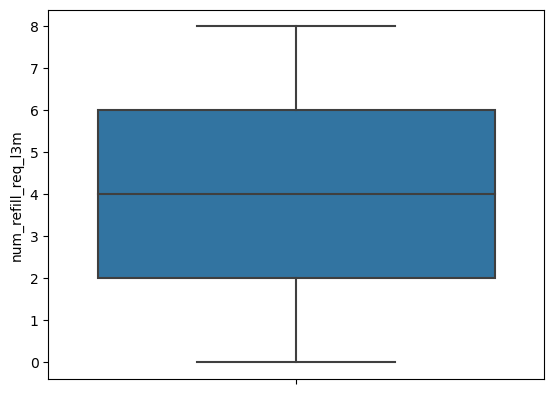

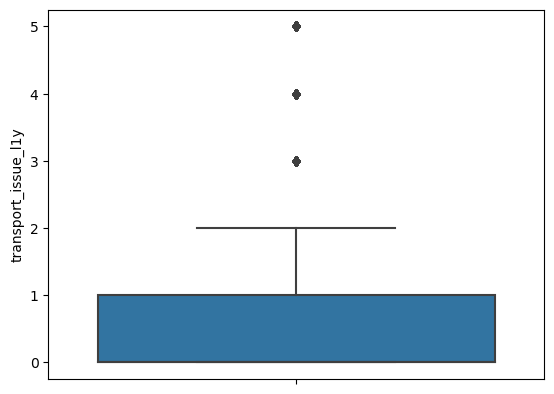

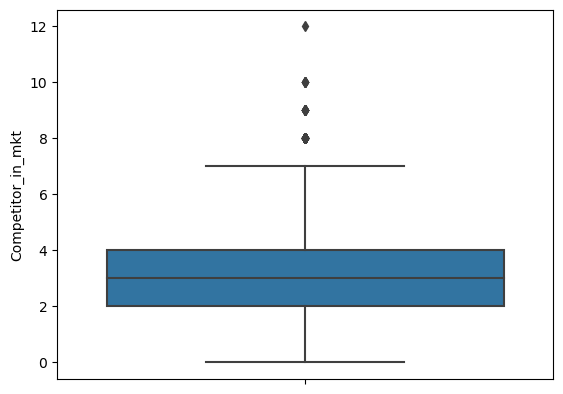

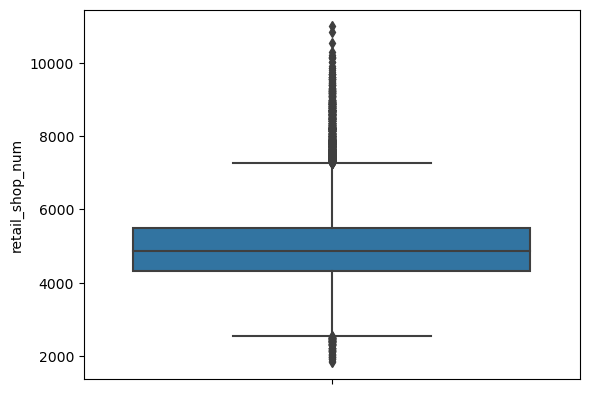

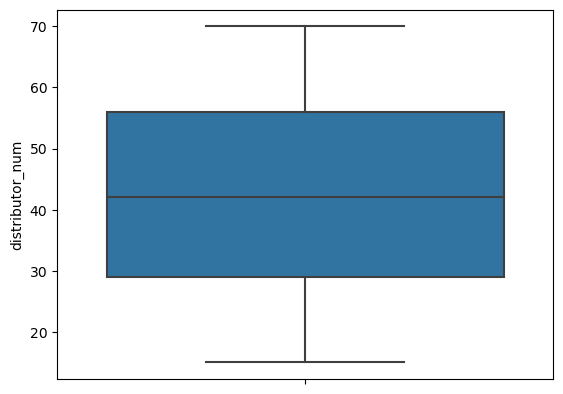

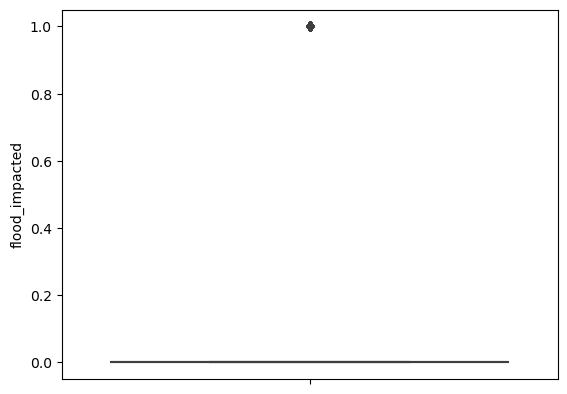

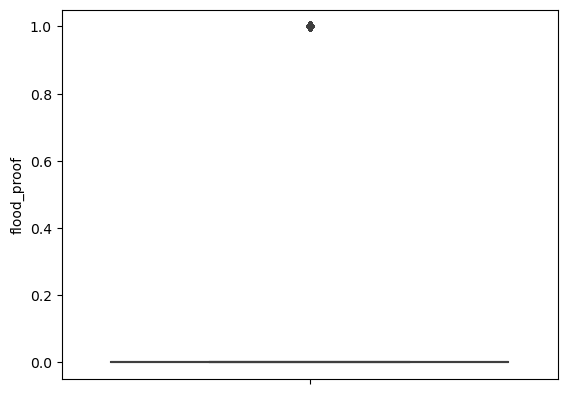

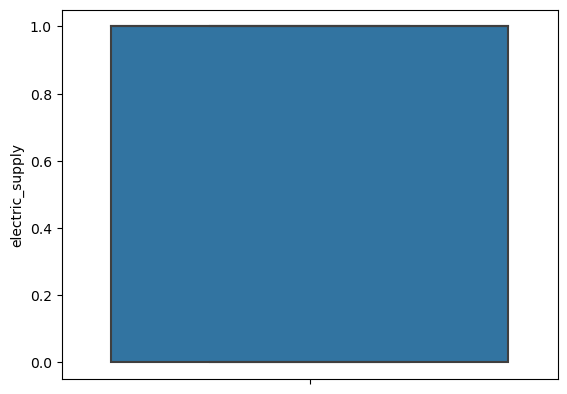

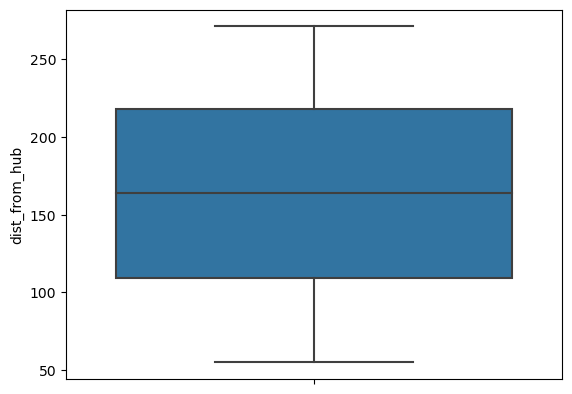

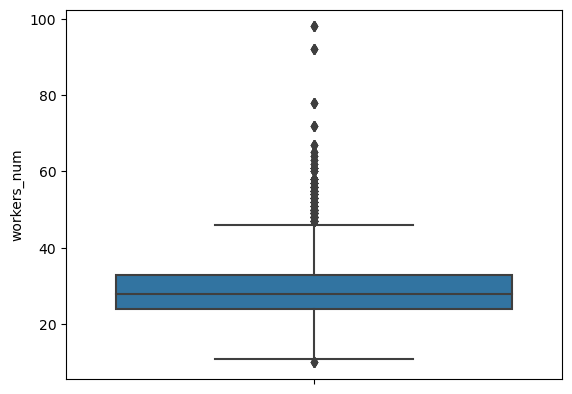

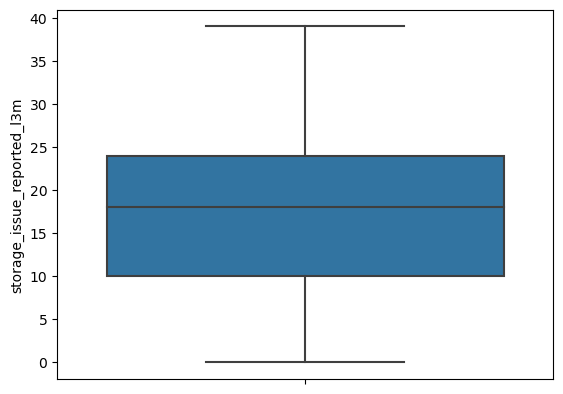

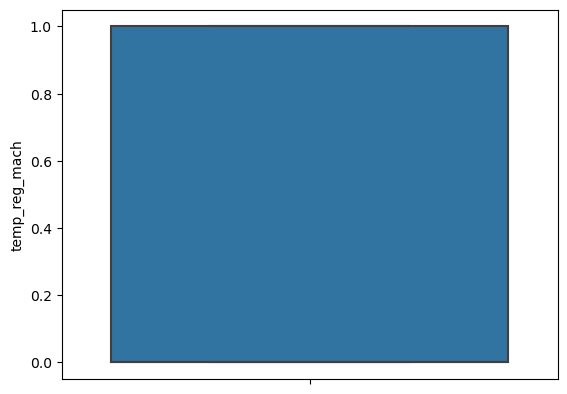

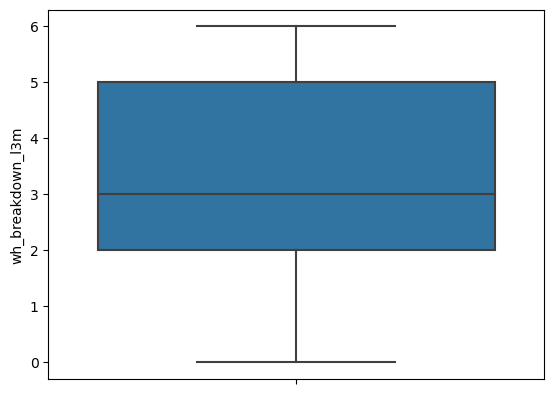

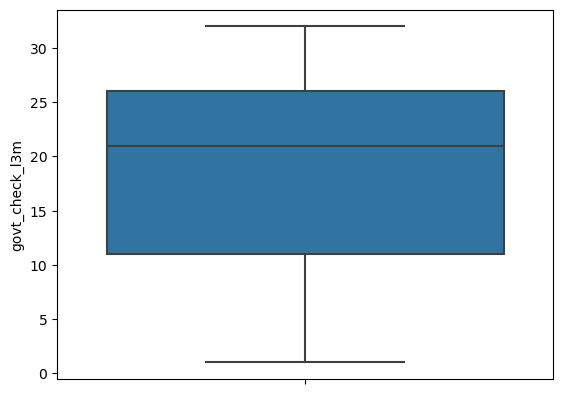

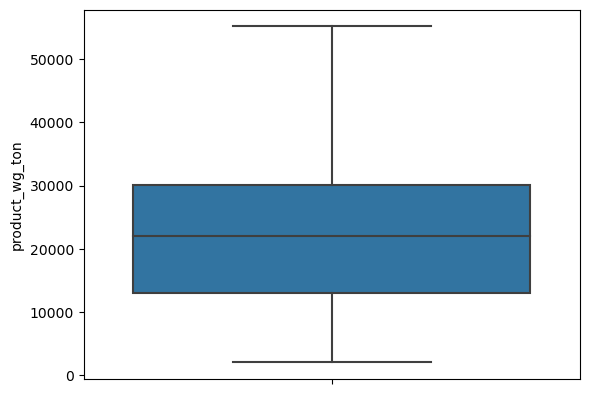

In [20]:
def boxplots(col):
    sns.boxplot(y=df[col])
    plt.show()
    
for i in df.select_dtypes(exclude=['object']).columns:
        boxplots(i)

# Univerate analysis

<AxesSubplot:xlabel='num_refill_req_l3m'>

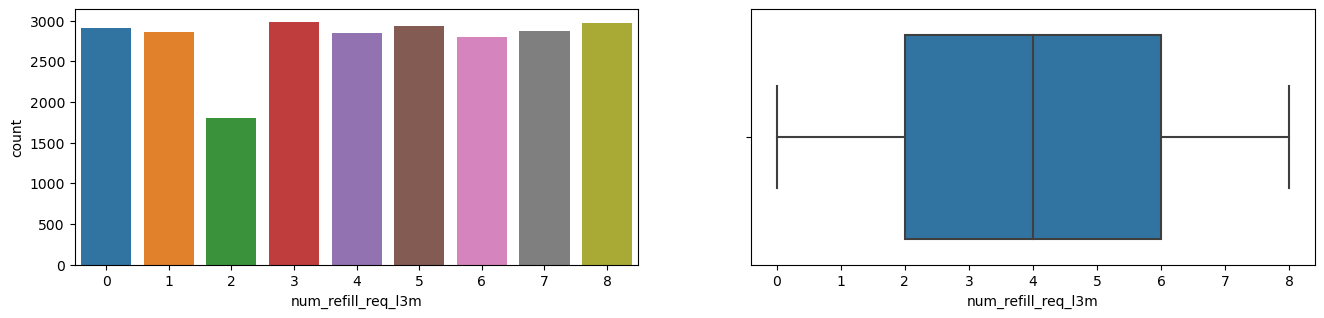

In [21]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.countplot(df['num_refill_req_l3m'])
plt.subplot(14,2,2)
sns.boxplot(df['num_refill_req_l3m'],)

<AxesSubplot:xlabel='transport_issue_l1y'>

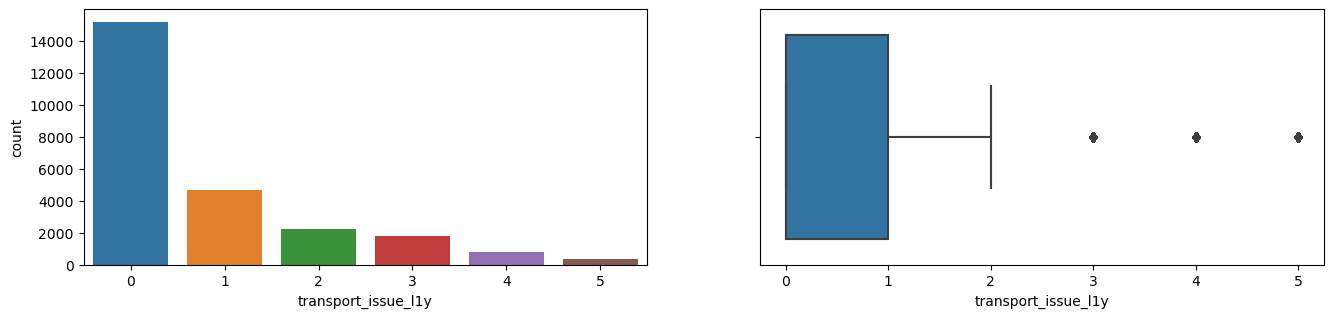

In [22]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.countplot(df['transport_issue_l1y'])
plt.subplot(14,2,2)
sns.boxplot(df['transport_issue_l1y'])


<AxesSubplot:xlabel='Competitor_in_mkt'>

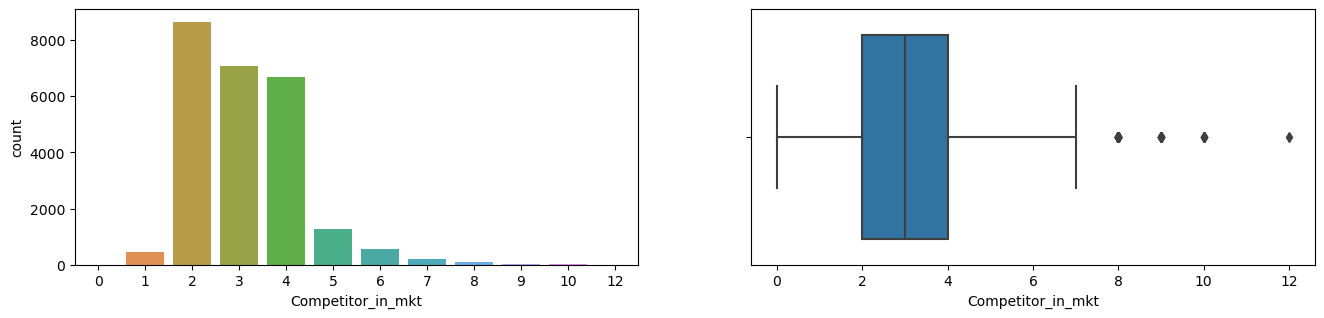

In [23]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.countplot(df['Competitor_in_mkt'],)
plt.subplot(14,2,2)
sns.boxplot(df['Competitor_in_mkt'])


<AxesSubplot:xlabel='retail_shop_num'>

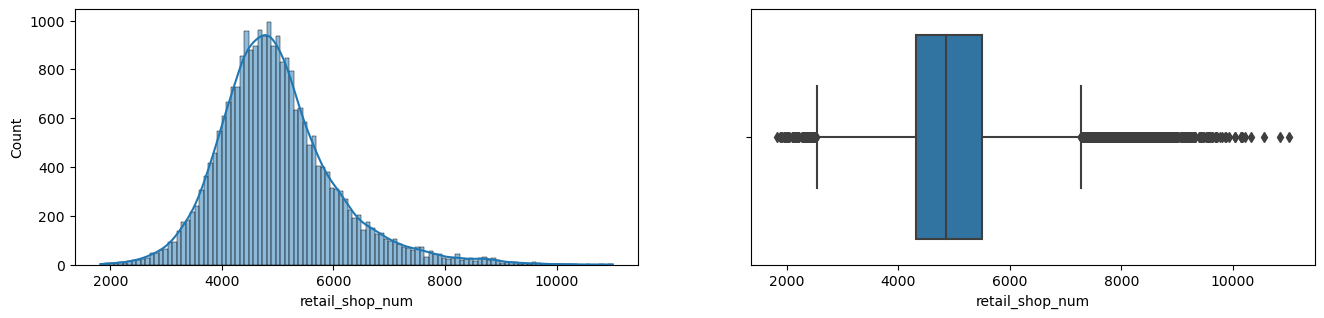

In [24]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.histplot(df['retail_shop_num'],kde=True)
plt.subplot(14,2,2)
sns.boxplot(df['retail_shop_num'])


<AxesSubplot:xlabel='storage_issue_reported_l3m'>

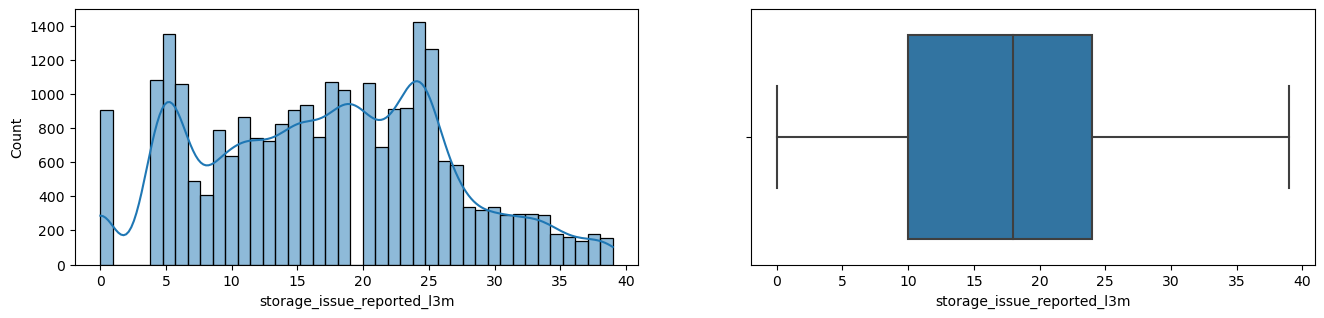

In [25]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.histplot(df['storage_issue_reported_l3m'],kde=True)
plt.subplot(14,2,2)
sns.boxplot(df['storage_issue_reported_l3m'])


<AxesSubplot:xlabel='dist_from_hub'>

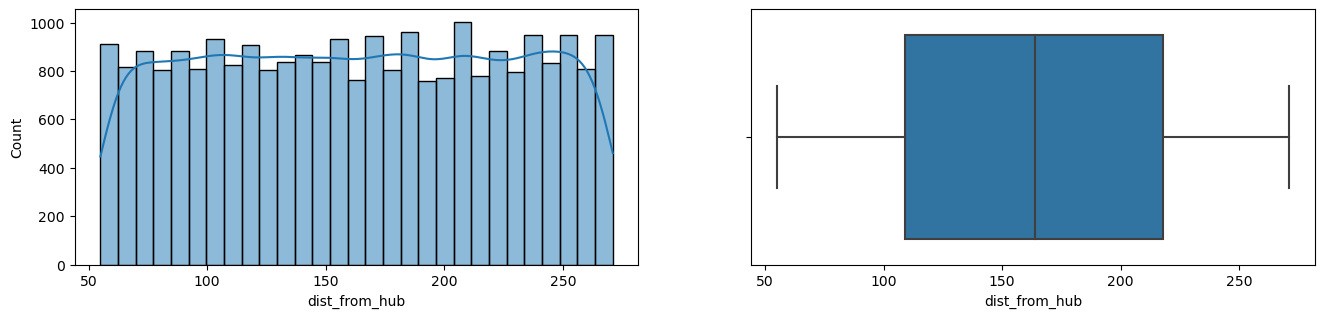

In [26]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.histplot(df['dist_from_hub'],kde=True)
plt.subplot(14,2,2)
sns.boxplot(df['dist_from_hub'])


<AxesSubplot:xlabel='product_wg_ton'>

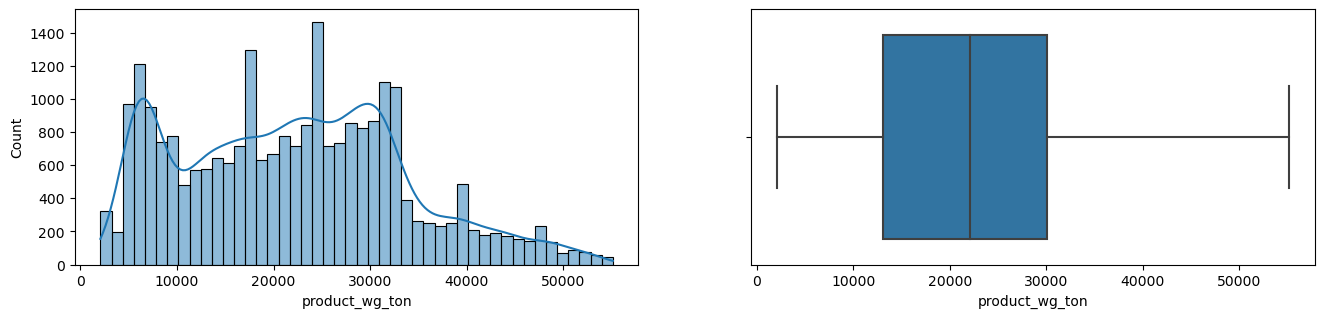

In [27]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.histplot(df['product_wg_ton'],kde=True)
plt.subplot(14,2,2)
sns.boxplot(df['product_wg_ton'])


In [28]:
df['flood_proof'].value_counts()

0    23634
1     1366
Name: flood_proof, dtype: int64

In [29]:
df['electric_supply'].value_counts()

1    16422
0     8578
Name: electric_supply, dtype: int64

# Bivariate and multi-variate analysis

<AxesSubplot:xlabel='temp_reg_mach', ylabel='storage_issue_reported_l3m'>

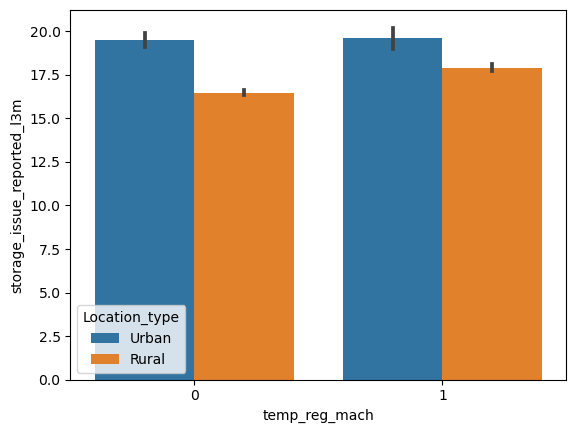

In [30]:
sns.barplot(x='temp_reg_mach' , y='storage_issue_reported_l3m',hue='Location_type' ,data=df )


<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='transport_issue_l1y'>

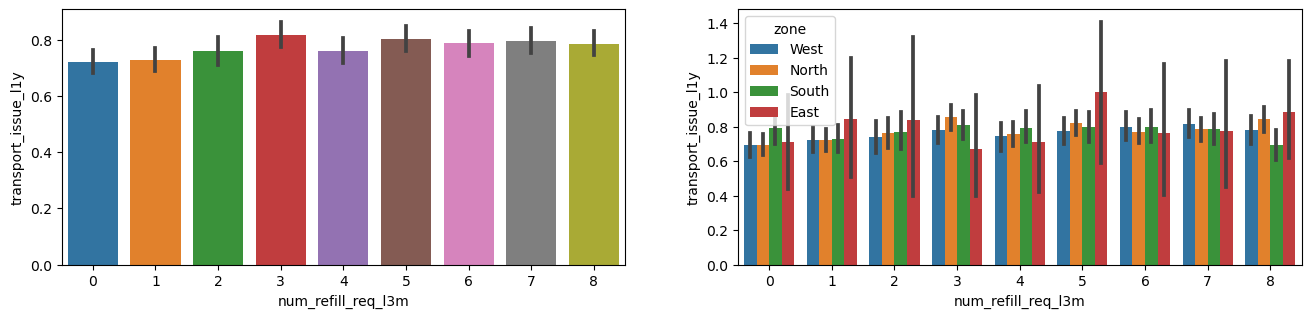

In [31]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(x='num_refill_req_l3m' ,y='transport_issue_l1y' ,data=df )
plt.subplot(14,2,2)
sns.barplot(x='num_refill_req_l3m' ,y='transport_issue_l1y' ,hue='zone',data=df )


# This plot say that max of refills and transfort issue occured.

#### By this graph we came to know that the transport issue is not likely to be related to number of refills. There is no increase in transport_issue_l1y as the no of refill increases. we can also analyse that the max transport issue has occured max in "east_zone" followed by "north_zone"

<AxesSubplot:xlabel='transport_issue_l1y', ylabel='retail_shop_num'>

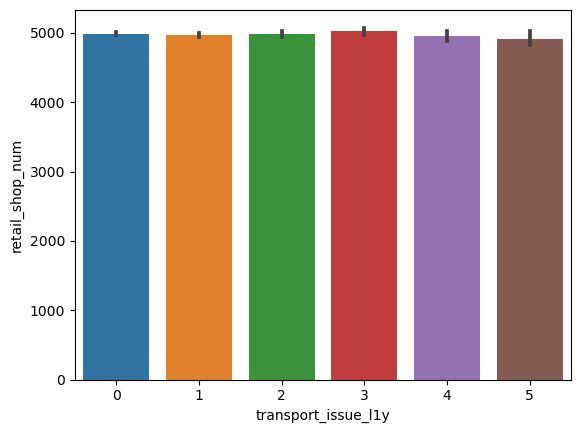

In [32]:
sns.barplot(y='retail_shop_num' ,x='transport_issue_l1y' ,data=df )


<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='retail_shop_num'>

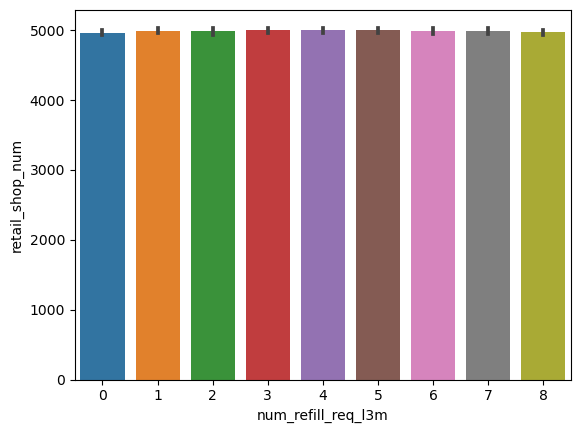

In [33]:
sns.barplot(x='num_refill_req_l3m' ,y='retail_shop_num' ,data=df )


##### Here we can find the issue in the refill of the wearhouse as the no: of refill increases the the number of stores are approx the same

<AxesSubplot:xlabel='flood_proof', ylabel='storage_issue_reported_l3m'>

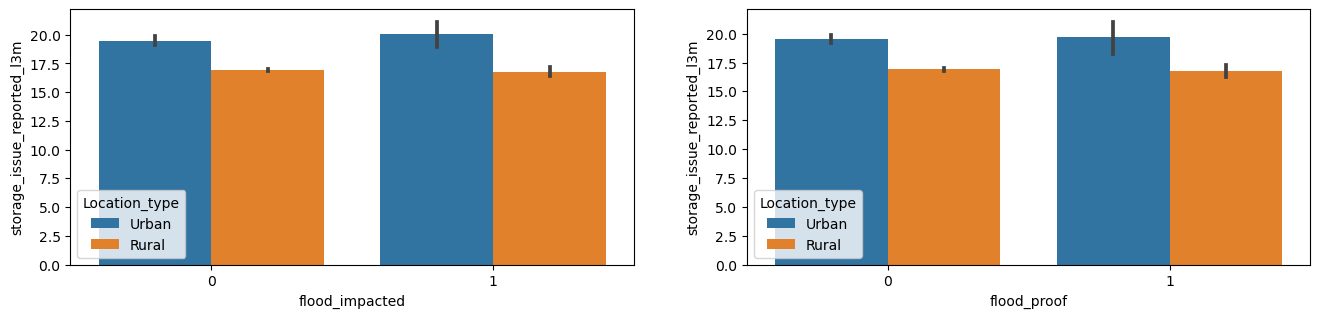

In [34]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(x='flood_impacted', y='storage_issue_reported_l3m', hue='Location_type', data=df)
plt.subplot(14,2,2)
sns.barplot(x='flood_proof', y='storage_issue_reported_l3m', hue='Location_type', data=df )


# This graph is to check storage_issue_occured  due to flood or not amd in which area the flood impacted. 

<AxesSubplot:xlabel='electric_supply', ylabel='storage_issue_reported_l3m'>

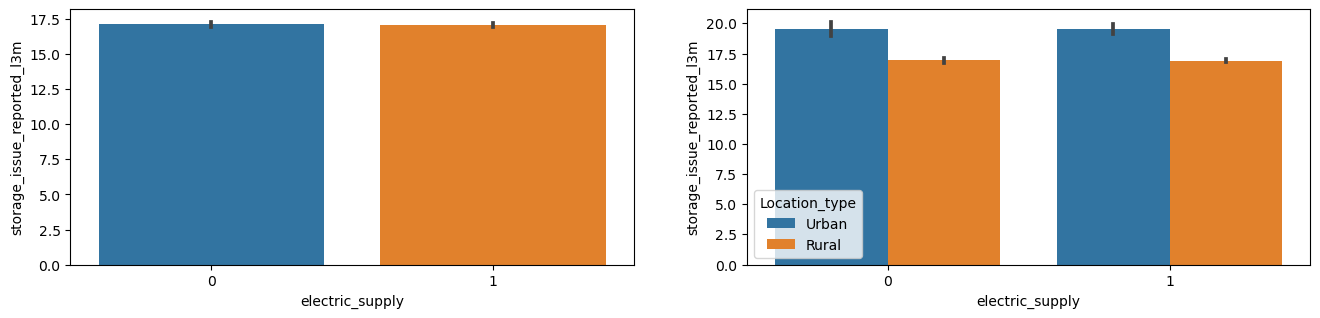

In [35]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(x='electric_supply' , y='storage_issue_reported_l3m' ,data=df )
plt.subplot(14,2,2)
sns.barplot(x='electric_supply', y='storage_issue_reported_l3m', hue='Location_type', data=df )


# This is to check storage_issue_reported due to electric_supply
# From this we can say that the storage issue is not related to electric supply as their is equal distrubution in both cases.

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='storage_issue_reported_l3m'>

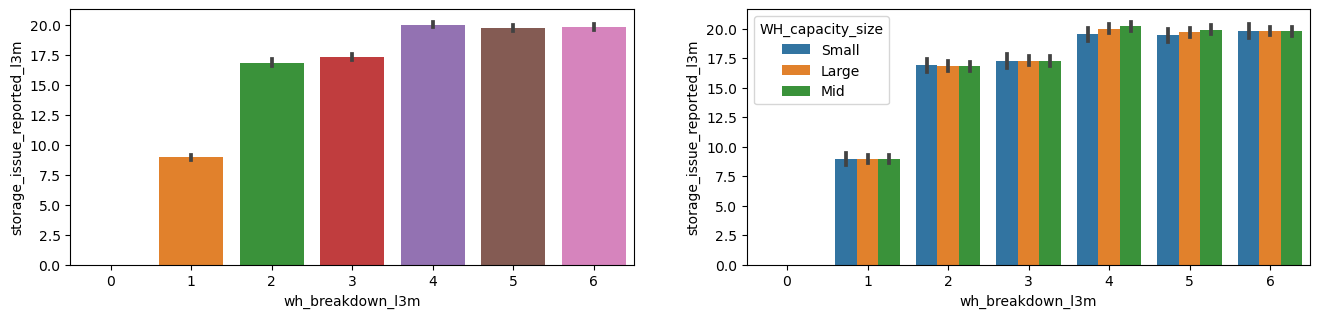

In [36]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(y='storage_issue_reported_l3m' ,x='wh_breakdown_l3m' ,data=df  )
plt.subplot(14,2,2)
sns.barplot(y='storage_issue_reported_l3m' ,x='wh_breakdown_l3m' ,hue='WH_capacity_size' ,data=df  )


# This is to check storage_issue_reported due to breakdown of the wearhouse.

### There is a positive relation between storage issue occured and breakdown of the wearhouse. 

<AxesSubplot:xlabel='temp_reg_mach', ylabel='storage_issue_reported_l3m'>

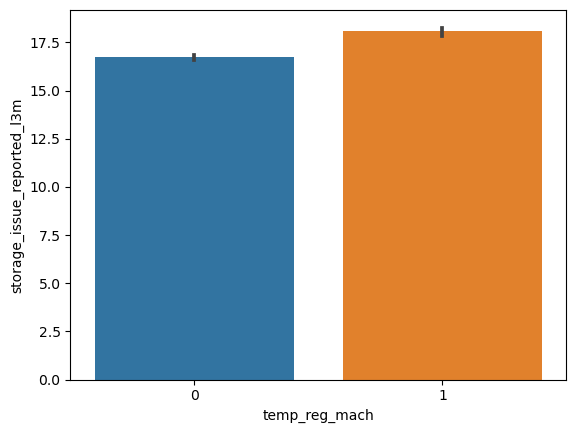

In [37]:
sns.barplot(x='temp_reg_mach' , y='storage_issue_reported_l3m' ,data=df )

# This is to check storage_issue_reported due to breakdown of the wearhouse.

<AxesSubplot:xlabel='Competitor_in_mkt', ylabel='retail_shop_num'>

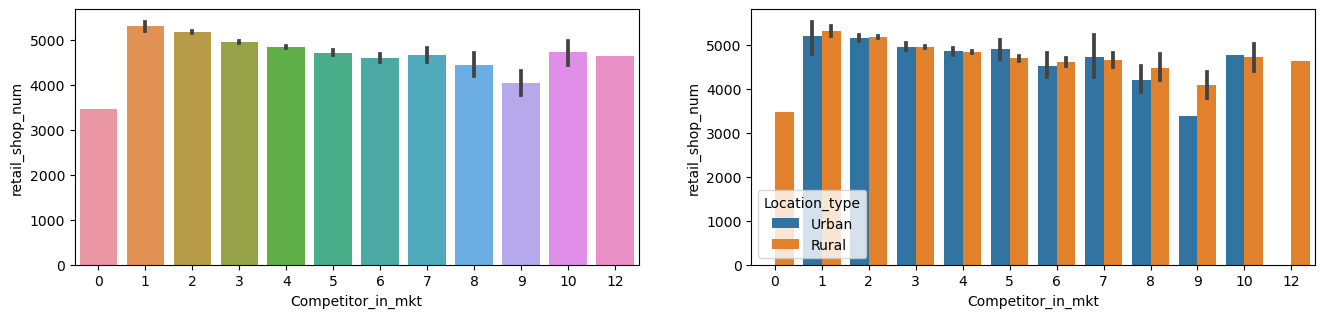

In [38]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(x='Competitor_in_mkt' ,y='retail_shop_num' ,data=df  )
plt.subplot(14,2,2)
sns.barplot(x='Competitor_in_mkt' ,y='retail_shop_num' ,hue='Location_type',data=df  )


<AxesSubplot:xlabel='num_refill_req_l3m', ylabel='product_wg_ton'>

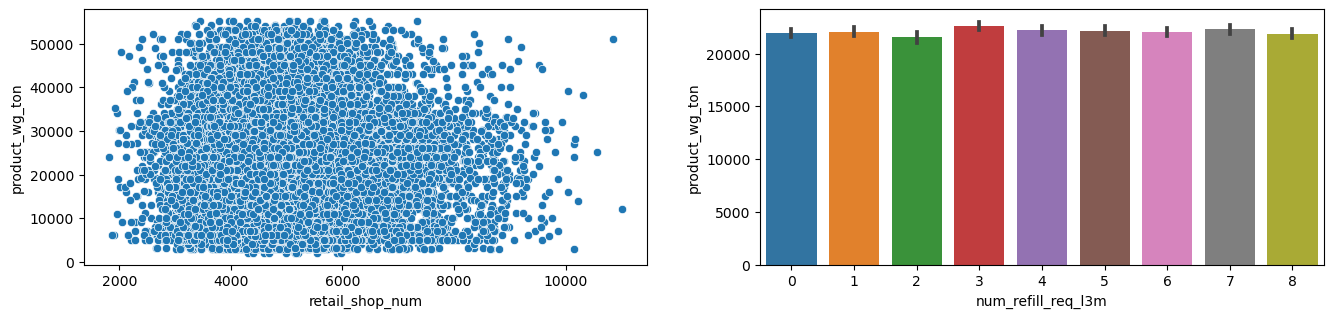

In [39]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.scatterplot(x='retail_shop_num' ,y='product_wg_ton' ,data=df  )
plt.subplot(14,2,2)
sns.barplot(x='num_refill_req_l3m' ,y='product_wg_ton' ,data=df  )
#

<AxesSubplot:xlabel='retail_shop_num', ylabel='product_wg_ton'>

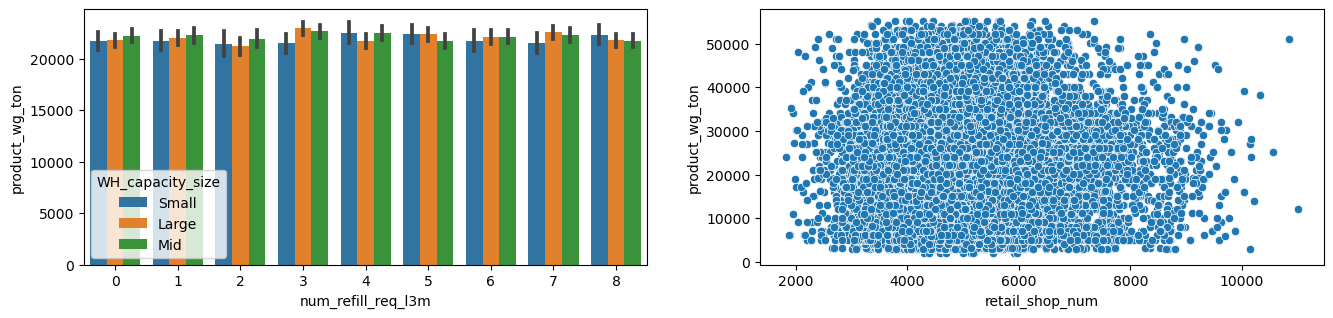

In [40]:
plt.figure(figsize=(16,55))
plt.subplot(14,2,1)
sns.barplot(x='num_refill_req_l3m' ,y='product_wg_ton' ,hue='WH_capacity_size',data=df  )
plt.subplot(14,2,2)
sns.scatterplot(x='retail_shop_num' ,y='product_wg_ton', data=df  )

In [41]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,0,1,142,34,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,0,1,130,28,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,0,1,147,29,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,0,1,60,25,18,0,A,6,30,25093


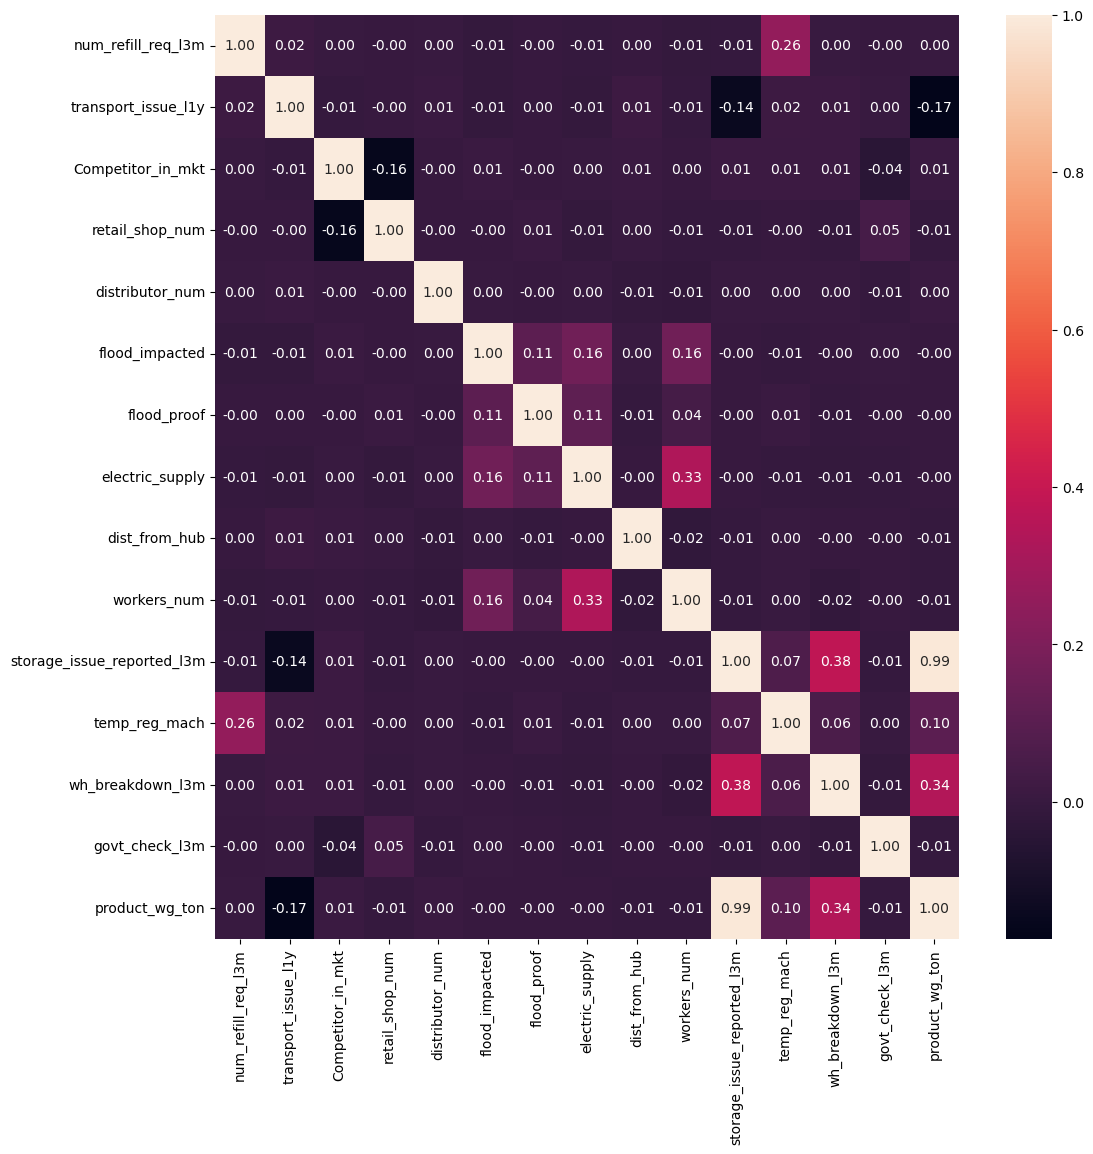

In [42]:
fig, ax =plt.subplots(figsize=(12,12))
heat = sns.heatmap(df.corr(),annot=True,fmt='.2f')

# converting the catagory  to int types before analysing

In [43]:
# Using Label Encoder
from sklearn.preprocessing import LabelEncoder
lecode=LabelEncoder()

In [44]:
print(df['Location_type'].unique())
df['Location_type']=lecode.fit_transform(df['Location_type'])

['Urban' 'Rural']


In [45]:
print(df['WH_capacity_size'].unique())
df['WH_capacity_size']=lecode.fit_transform(df['WH_capacity_size'])

['Small' 'Large' 'Mid']


In [46]:
print(df['zone'].unique())

df['zone']=lecode.fit_transform(df['zone'])

['West' 'North' 'South' 'East']


In [47]:
print(df['WH_regional_zone'].unique())

df['WH_regional_zone']=lecode.fit_transform(df['WH_regional_zone'])

['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']


In [48]:
print(df['wh_owner_type'].unique())

df['wh_owner_type']=lecode.fit_transform(df['wh_owner_type'])

['Rented' 'Company Owned']


In [49]:
print(df['approved_wh_govt_certificate'].unique())

df['approved_wh_govt_certificate']=lecode.fit_transform(df['approved_wh_govt_certificate'])

['A' 'A+' 'C' 'B' 'B+' 'c']


In [50]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,2,3,5,3,1,2,4651,...,1,1,91,29,13,0,0,5,15,17115
1,WH_100001,EID_50001,0,0,1,4,0,0,4,6217,...,0,1,210,31,4,0,0,3,17,5074
2,WH_100002,EID_50002,0,1,2,1,1,0,4,4306,...,0,0,161,37,17,0,0,6,22,23137
3,WH_100003,EID_50003,0,1,1,2,7,4,2,6000,...,0,0,103,21,17,1,1,3,27,22115
4,WH_100004,EID_50004,0,0,1,4,3,1,2,4740,...,0,1,112,25,18,0,4,6,24,24071


### Dropping the columns

In [51]:
df.drop(["Ware_house_ID", "WH_Manager_ID"], axis=1 ,inplace=True)


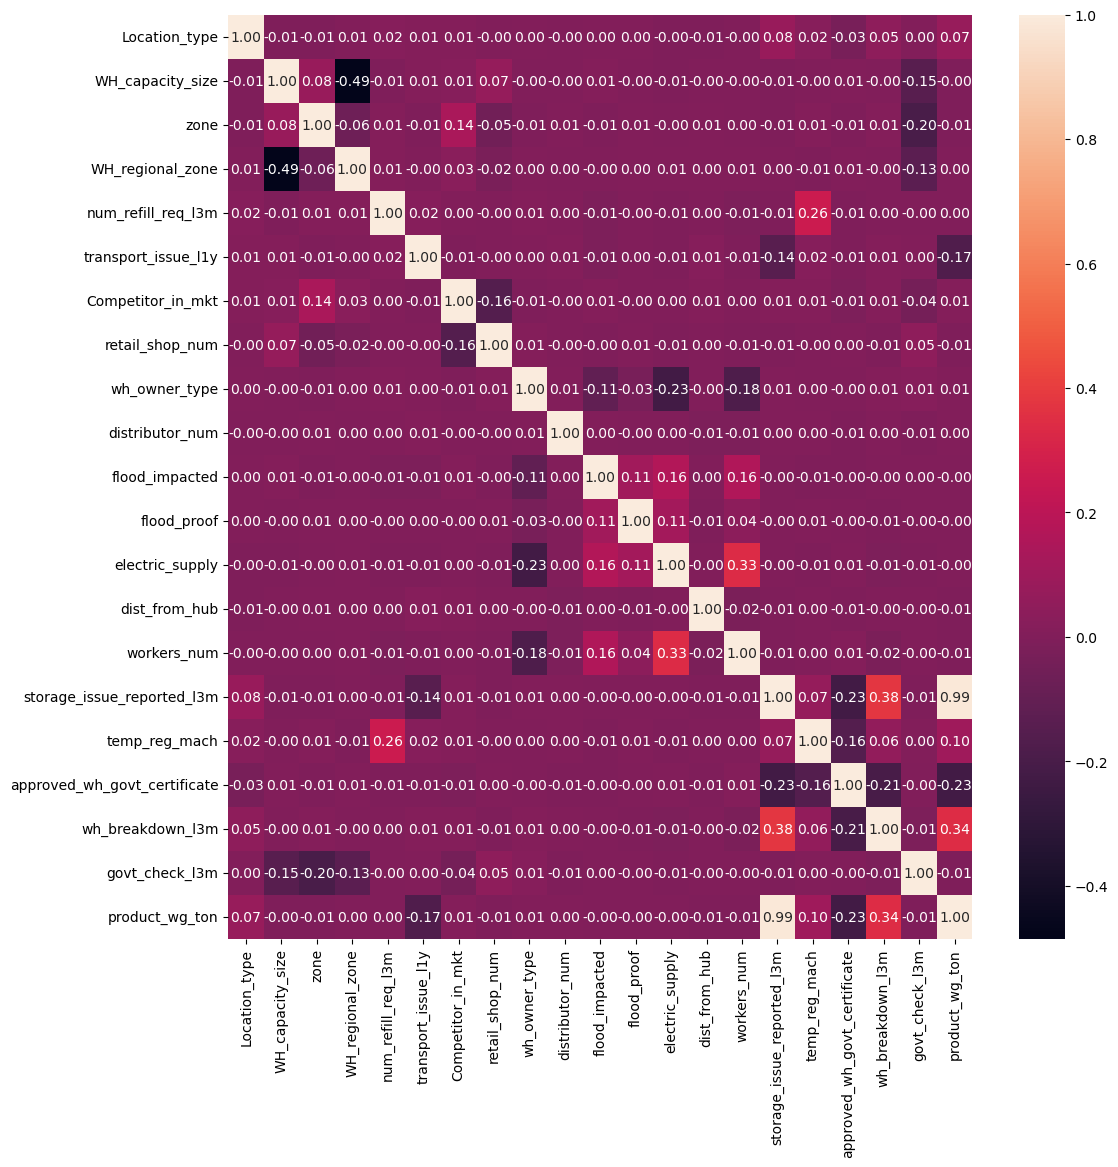

In [52]:
fig, ax =plt.subplots(figsize=(12,12))
heat = sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [53]:
x = df.iloc[:,:-1]
x.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25,18,0,4,6,24


In [54]:
y=df.loc[:,df.columns=="product_wg_ton"]
y.head()

,product_wg_ton
0,17115
1,5074
2,23137
3,22115
4,24071


# Feature Selection

In [65]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfe2=RFE(RandomForestRegressor(),n_features_to_select=6)

In [67]:
rfe2.fit(x,y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=6)

In [68]:
l2_rfe2 =x.columns[rfe2.get_support()]

In [69]:
list(l2_rfe2)

['retail_shop_num',
 'distributor_num',
 'dist_from_hub',
 'workers_num',
 'storage_issue_reported_l3m',
 'approved_wh_govt_certificate']

In [70]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

In [71]:
SKB2 = SelectKBest(f_classif, k=6).fit(x, y)

In [72]:
l3_SKB2 = x.columns[SKB2.get_support()]

In [73]:
list(l3_SKB2)

['Location_type',
 'num_refill_req_l3m',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'wh_breakdown_l3m']

In [74]:
list(set(list(l2_rfe2)+list(l3_SKB2)))

['storage_issue_reported_l3m',
 'workers_num',
 'num_refill_req_l3m',
 'wh_breakdown_l3m',
 'retail_shop_num',
 'Location_type',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'distributor_num',
 'dist_from_hub']

In [75]:
Final_list=['storage_issue_reported_l3m',
 'workers_num',
 'num_refill_req_l3m',
 'wh_breakdown_l3m',
 'retail_shop_num',
 'Location_type',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'distributor_num',
 'dist_from_hub'   
]

In [77]:
x_new=x[Final_list]

In [78]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
4,15.321630,retail_shop_num
1,11.590899,workers_num
8,7.078294,distributor_num
9,6.919186,dist_from_hub
3,5.921801,wh_breakdown_l3m
0,5.219012,storage_issue_reported_l3m
2,3.597037,num_refill_req_l3m
7,3.187948,approved_wh_govt_certificate
6,1.580953,temp_reg_mach
5,1.096423,Location_type


In [80]:
x_new.drop('retail_shop_num',axis=1,inplace=True)

In [81]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
1,9.807726,workers_num
7,6.605241,distributor_num
8,6.449579,dist_from_hub
3,5.774354,wh_breakdown_l3m
0,5.120932,storage_issue_reported_l3m
2,3.532681,num_refill_req_l3m
6,3.051122,approved_wh_govt_certificate
5,1.579314,temp_reg_mach
4,1.096245,Location_type


In [82]:
x_new.drop('workers_num',axis=1,inplace=True)

In [83]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
6,5.950793,distributor_num
7,5.824286,dist_from_hub
2,5.572264,wh_breakdown_l3m
0,4.965198,storage_issue_reported_l3m
1,3.452246,num_refill_req_l3m
5,2.828100,approved_wh_govt_certificate
4,1.575505,temp_reg_mach
3,1.096035,Location_type


In [84]:
x_new.drop('distributor_num',axis=1,inplace=True)

In [105]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
2,5.342610,wh_breakdown_l3m
6,5.213543,dist_from_hub
0,4.809524,storage_issue_reported_l3m
1,3.355945,num_refill_req_l3m
5,2.630121,approved_wh_govt_certificate
4,1.572509,temp_reg_mach
3,1.095892,Location_type


In [119]:
x_new.drop('wh_breakdown_l3m',axis=1,inplace=True)

In [120]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
5,4.783576,dist_from_hub
0,3.415529,storage_issue_reported_l3m
1,3.298196,num_refill_req_l3m
4,2.618633,approved_wh_govt_certificate
3,1.568029,temp_reg_mach
2,1.094893,Location_type


In [121]:
new_data = pd.concat([x_new,y],axis=1)

In [122]:
new_data

,storage_issue_reported_l3m,num_refill_req_l3m,Location_type,temp_reg_mach,approved_wh_govt_certificate,dist_from_hub,product_wg_ton
0,13,3,1,0,0,91,17115
1,4,0,0,0,0,210,5074
2,17,1,0,0,0,161,23137
3,17,7,0,1,1,103,22115
4,18,3,0,0,4,112,24071
...,...,...,...,...,...,...,...
24995,22,3,0,1,0,142,32093
24996,10,6,0,0,2,130,12114
24997,23,7,1,0,3,147,27080
24998,18,1,0,0,0,60,25093


In [123]:
x = new_data.iloc[:,:-1]
x.head()

,storage_issue_reported_l3m,num_refill_req_l3m,Location_type,temp_reg_mach,approved_wh_govt_certificate,dist_from_hub
0,13,3,1,0,0,91
1,4,0,0,0,0,210
2,17,1,0,0,0,161
3,17,7,0,1,1,103
4,18,3,0,0,4,112


In [124]:
y=new_data.loc[:,new_data.columns=="product_wg_ton"]
y.head()

,product_wg_ton
0,17115
1,5074
2,23137
3,22115
4,24071


# Model Building

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
ss=StandardScaler()
ss.fit_transform(x)

array([[-0.45087587, -0.41780748,  3.35214954, -0.65977028, -1.46088002,
        -1.15657492],
       [-1.43330942, -1.56874998, -0.29831605, -0.65977028, -1.46088002,
         0.74082652],
       [-0.01423874, -1.18510248, -0.29831605, -0.65977028, -1.46088002,
        -0.04045643],
       ...,
       [ 0.64071696,  1.11678253,  3.35214954, -0.65977028,  0.52725283,
        -0.26368013],
       [ 0.09492055, -1.18510248, -0.29831605, -0.65977028, -1.46088002,
        -1.65085597],
       [-1.43330942,  1.50043003, -0.29831605, -0.65977028,  0.52725283,
         1.20321847]])

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [128]:
xtrain.head()

,storage_issue_reported_l3m,num_refill_req_l3m,Location_type,temp_reg_mach,approved_wh_govt_certificate,dist_from_hub
18346,15,8,1,0,0,163
5746,17,8,0,0,4,266
21083,21,8,0,0,3,220
11145,4,5,0,0,4,220
6266,26,0,0,0,3,80


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [130]:
def predict(ml_model):
    
    print('Model is: {}'.format(ml_model))
    model = ml_model.fit(xtrain,ytrain)
    print('Training_score: {}'.format(model.score(xtrain,ytrain)))
    predictions = model.predict(xtest)
    
    r2score = r2_score(ytest,predictions)
    print('R2 score: {}'.format(r2score))
    
    adj_r2score = 1-(1-r2score)*((len(xtest)-1)/(len(xtest)-xtest.shape[1]-1))
    print(f'Adjusted R2_Score: {adj_r2score}')
    
    print('MAE: {}'.format(mean_absolute_error(ytest, predictions)))
    print('MSE: {}'.format(mean_squared_error(ytest,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(ytest,predictions))))
    

In [131]:
predict(LinearRegression())

Model is: LinearRegression()
Training_score: 0.9746043396223188
R2 score: 0.9765215720226931
Adjusted R2_Score: 0.9764933584100626
MAE: 1275.953778501344
MSE: 3191412.5848540664
RMSE: 1786.452514021592


In [132]:
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor()
Training_score: 0.9996229850975794
R2 score: 0.9857182178647098
Adjusted R2_Score: 0.9857010556991156
MAE: 955.7757
MSE: 1941316.483572222
RMSE: 1393.3113376314075


In [133]:
predict(RandomForestRegressor())

Model is: RandomForestRegressor()
Training_score: 0.9984401846867992
R2 score: 0.9909984384436357
Adjusted R2_Score: 0.9909876214259432
MAE: 811.4572946417027
MSE: 1223578.3785049983
RMSE: 1106.1547714967369


In [134]:
predict(XGBRegressor())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training_score: 0.9947343607249058
R2 score: 0.9923700964479948
Adjusted R2_Score: 0.9923609277275237
MAE: 761.555043359375
MSE: 1037129.4977937988
RMSE: 1018.3955507531437


In [135]:
from  sklearn import linear_model
lasso = linear_model.Lasso(alpha=50 , max_iter=100, tol=0.1)
lasso.fit(xtrain,ytrain)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [142]:
predict(lasso)

Model is: Lasso(alpha=50, max_iter=100, tol=0.1)
Training_score: 0.9744939391583387
R2 score: 0.9763688816736446
Adjusted R2_Score: 0.9763404845757159
MAE: 1278.8391097759213
MSE: 3212167.718119811
RMSE: 1792.252135755405


In [137]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(xtrain,ytrain)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [143]:
predict(ridge)

Model is: Ridge(alpha=50, max_iter=100, tol=0.1)
Training_score: 0.9746041358073461
R2 score: 0.9765182943192401
Adjusted R2_Score: 0.9764900767678513
MAE: 1276.078421101068
MSE: 3191858.121670222
RMSE: 1786.5772084268349


## Final Score of the Model